In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme()
%matplotlib inline

## Preparation 

Here, we show how to interpret outputs from our algorithm. 
First, download results when running our algorithm from Wandb as follows 
```
aaaaa
```
Then, in each tolder, we would get three fiels
* ```debug/```: Generated proteins in pdb format. We record generated proteins in each iteration. Using softwares, we can visulaize them. 
* ```output.csv```: Metrics of generated protiens in final iteration
* ```trajectory.txt```: We record rewards for each iteration 


In [3]:
import os 
os.system('unzip partial_logs.zip')

Archive:  partial_logs.zip
   creating: partial_logs/
  inflating: partial_logs/.DS_Store  
  inflating: __MACOSX/partial_logs/._.DS_Store  
   creating: partial_logs/2025-02-12 09:53:08.369650SVDD_edit_match_ss_1_r15_96_TrROS_Hall/
  inflating: __MACOSX/partial_logs/._2025-02-12 09:53:08.369650SVDD_edit_match_ss_1_r15_96_TrROS_Hall  
   creating: partial_logs/2025-02-12 18:20:40.817082SVDD_edit_symmetry,hydrophobic,plddt_1,1,1_None/
  inflating: __MACOSX/partial_logs/._2025-02-12 18:20:40.817082SVDD_edit_symmetry,hydrophobic,plddt_1,1,1_None  
   creating: partial_logs/2025-02-11 22:47:39.346838SVDD_edit_crmsd_1_5KPH/
  inflating: __MACOSX/partial_logs/._2025-02-11 22:47:39.346838SVDD_edit_crmsd_1_5KPH  
  inflating: partial_logs/2025-02-12 09:53:08.369650SVDD_edit_match_ss_1_r15_96_TrROS_Hall/.DS_Store  
  inflating: __MACOSX/partial_logs/2025-02-12 09:53:08.369650SVDD_edit_match_ss_1_r15_96_TrROS_Hall/._.DS_Store  
  inflating: partial_logs/2025-02-12 09:53:08.369650SVDD_edit_match_

0

# 1. Symmetry 

In [4]:
data = pd.read_csv("partial_logs/2025-02-12 18:20:40.817082SVDD_edit_symmetry,hydrophobic,plddt_1,1,1_None/trajectory.txt")

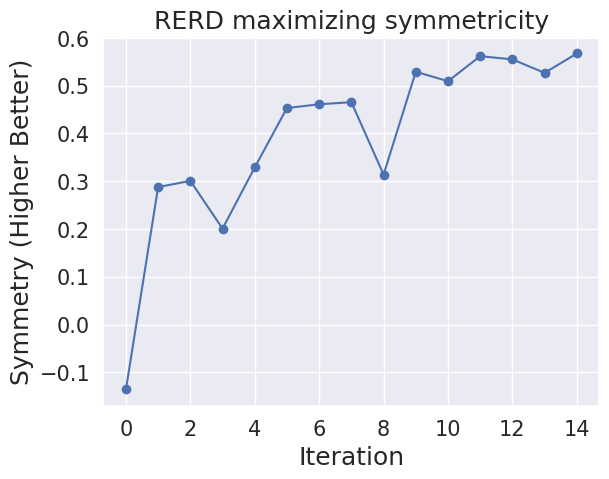

In [5]:
mean_list = [ ]
for i in range(15):
    mean_list.append(np.median(data.loc[i]))

plt.xticks(fontsize=15)  # Set x-axis tick font size
plt.yticks(fontsize=15)  # Set y-axis tick font size
plt.scatter([i for i in range(15)], mean_list)
plt.plot([i for i in range(15)],mean_list)
plt.xlabel('Iteration', fontsize=18)

plt.ylabel('Symmetry (Higher Better)', fontsize=18)
plt.title('RERD maximizing symmetricity', fontsize=18)
plt.savefig("trajcectory_symmetry",bbox_inches='tight')



In [6]:
generated_proteins = pd.read_csv("partial_logs/2025-02-12 18:20:40.817082SVDD_edit_symmetry,hydrophobic,plddt_1,1,1_None/output.csv")

In [7]:
generated_proteins.head(10)

,symmetry,hydrophobic,plddt,plddt.1,ptm,likelihood,cur_diversity
0,-0.072908,-0.211905,0.812735,0.812735,0.794260,-92.125260,0.313333
1,-0.056280,-0.168443,0.804565,0.804565,0.770819,-94.042730,0.313333
2,-0.058395,-0.202198,0.825185,0.825185,0.793395,-94.995220,0.313333
3,-0.063811,-0.136508,0.816990,0.816990,0.794585,-97.590470,0.313333
4,-0.045127,-0.190476,0.852214,0.852214,0.839613,-95.822480,0.313333
5,-0.062126,-0.205357,0.838683,0.838683,0.842479,-94.862434,0.313333
6,-0.057658,-0.191327,0.574706,0.574706,0.446409,-98.421660,0.313333
7,-0.131729,-0.102757,0.764551,0.764551,0.745327,-96.902260,0.313333
8,-0.097371,-0.213307,0.706289,0.706289,0.618626,-94.703990,0.313333
9,-0.087518,-0.189135,0.846587,0.846587,0.827306,-94.031210,0.313333


## 2. cRMSD

In [8]:
data = pd.read_csv("partial_logs/2025-02-11 22:47:39.346838SVDD_edit_crmsd_1_5KPH/trajectory.txt")

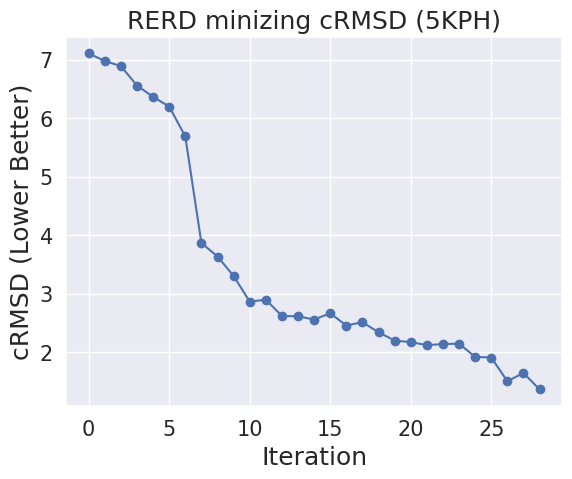

In [9]:
import seaborn as sns
sns.set_theme()
mean_list = [ ]
for i in range(29):
    mean_list.append(-np.median(data.loc[i]))

plt.xticks(fontsize=15)  # Set x-axis tick font size
plt.yticks(fontsize=15)  # Set y-axis tick font size
plt.scatter([i for i in range(29)], mean_list)
plt.plot([i for i in range(29)],mean_list)
plt.xlabel('Iteration', fontsize=18)

plt.ylabel('cRMSD (Lower Better)', fontsize=18)
plt.title('RERD minizing cRMSD (5KPH)', fontsize=18)
plt.savefig("trajectory_cRMSD_5KPH",bbox_inches='tight')



In [10]:
generated_proteins = pd.read_csv("../log/2025-02-11 22:47:39.346838SVDD_edit_crmsd_1_5KPH/output.csv")

In [11]:
generated_proteins.head(10)

,crmsd,plddt,ptm,likelihood,cur_diversity
0,-0.974486,0.571923,0.427306,-283.56330,0.161159
1,-1.422081,0.447450,0.255260,-287.41130,0.161159
2,-2.898464,0.449164,0.269853,-287.56310,0.161159
3,-1.046945,0.528192,0.365821,-279.82852,0.161159
4,-1.966755,0.597007,0.434011,-282.27362,0.161159
5,-3.953882,0.424010,0.242923,-290.34048,0.161159
6,-0.992137,0.512352,0.340395,-280.54642,0.161159
7,-1.300677,0.501870,0.329795,-277.79630,0.161159
8,-1.035564,0.506404,0.299271,-279.54623,0.161159
9,-6.272455,0.377276,0.150104,-285.82986,0.161159


## 3. SS Match 

In [12]:
data = pd.read_csv("partial_logs/2025-02-12 09:53:08.369650SVDD_edit_match_ss_1_r15_96_TrROS_Hall/trajectory.txt")

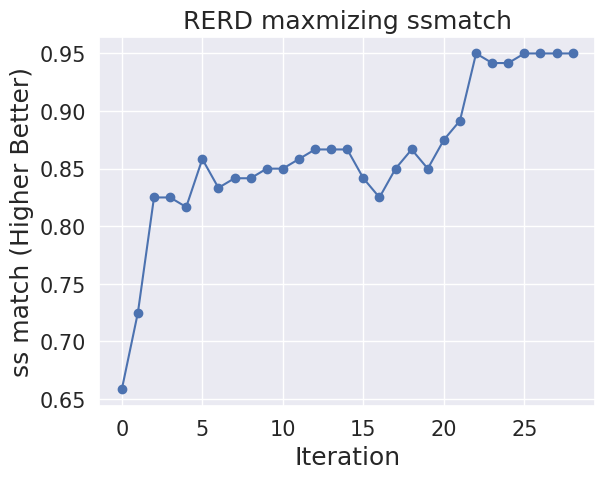

In [13]:
import seaborn as sns
sns.set_theme()
mean_list = [ ]
for i in range(29):
    mean_list.append(np.median(data.loc[i]))

plt.xticks(fontsize=15)  # Set x-axis tick font size
plt.yticks(fontsize=15)  # Set y-axis tick font size
plt.scatter([i for i in range(29)], mean_list)
plt.plot([i for i in range(29)],mean_list)
plt.xlabel('Iteration', fontsize=18)

plt.ylabel('ss match (Higher Better)', fontsize=18)
plt.title('RERD maxmizing ssmatch', fontsize=18)
plt.savefig("trajcectory_ssmatch_r15_96_TrROS_Hall",bbox_inches='tight')



In [14]:
generated_proteins = pd.read_csv("partial_logs/2025-02-12 09:53:08.369650SVDD_edit_match_ss_1_r15_96_TrROS_Hall/output.csv")

In [15]:
generated_proteins.head(10)

,match_ss,plddt,ptm,likelihood,cur_diversity
0,0.950000,0.486394,0.298561,-228.76205,0.389
1,0.866667,0.596358,0.335868,-230.74869,0.389
2,0.883333,0.514896,0.329267,-232.34006,0.389
3,0.966667,0.626473,0.445772,-234.44353,0.389
4,0.950000,0.493193,0.355623,-232.30814,0.389
5,0.950000,0.588884,0.417105,-221.33420,0.389
6,0.900000,0.504624,0.335101,-234.86174,0.389
7,0.950000,0.606106,0.460466,-219.11835,0.389
8,0.950000,0.585441,0.388228,-223.09187,0.389
9,0.916667,0.578407,0.392836,-223.34923,0.389
